In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load datasets
train = pd.read_csv('~/Desktop/DigitRecognizer/data/train.csv')
test = pd.read_csv('~/Desktop/DigitRecognizer/data/test.csv')

print 'Train Set Shape: {}'.format(train.shape)
print 'Test Set Shape: {}'.format(test.shape)

Train Set Shape: (42000, 785)
Test Set Shape: (28000, 784)


In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Separate the label from the feature vectors
train_y = train['label']
del train['label']

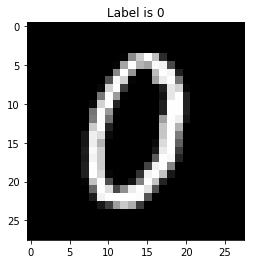

In [5]:
# Visualize a sample image 
sample_label = train_y[5]
sample_image = train.iloc[5]
pixels = np.array(sample_image, dtype='uint8')

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))

# Plot
plt.title('Label is {}'.format(sample_label))
plt.imshow(pixels, cmap='gray')
plt.show()

In [6]:
%%capture output

# Tune k
k_list = range(1,11)

# Split data into hold-out set
X_train, X_test, y_train, y_test = train_test_split(train, train_y, test_size=0.2, random_state=42)

print('k', 'Error Rate')
for k in k_list:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    err_rate = 1 - accuracy_score(y_test, preds)
    print(k, err_rate)

# # Also see GridSearchCV in the model_selection class
# # from sklearn.model_selection import GridSearchCV
# parameters = {'n_neighbors': k_list}
# clf = GridSearchCV(KNeighborsClassifier, parameters)
# clf.fit(X_train, y_train)
# print 'Best Parameter: {}'.format(best_params_)

In [7]:
output.show()

('k', 'Error Rate')
(1, 0.031309523809523787)
(2, 0.037857142857142811)
(3, 0.033333333333333326)
(4, 0.035595238095238124)
(5, 0.035119047619047605)
(6, 0.036309523809523792)
(7, 0.03678571428571431)
(8, 0.037261904761904718)
(9, 0.038690476190476164)
(10, 0.03833333333333333)


In [8]:
# Fit k-NN
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(train, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [9]:
# Make predictions on test set
preds = clf.predict(test)

In [10]:
# Format submission, 1-indexed, column labels ImageId and Label
ImageId = np.array(range(1,len(preds)+1))
d = {'ImageId': ImageId, 'Label': preds}
df_preds = pd.DataFrame(d)
df_preds.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [11]:
# Export results to CSV
sub_number = 3
df_preds.to_csv('submissions/submission{}.csv'.format(sub_number), index=False)